# **LeNet-5 Architecture**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/'

# **1. Import libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# **2. We construct an instance of ImageDataGenerator class.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        dataset_path,
        target_size = (28, 28),
        batch_size = 16,
        color_mode='grayscale',
        class_mode='categorical')

Found 480 images belonging to 8 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        dataset_path,
        target_size = (28, 28),
        batch_size = 16,
        color_mode='grayscale',
        class_mode='categorical')

Found 480 images belonging to 8 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        dataset_path,
        target_size = (28, 28),
        batch_size = 16,
        color_mode='grayscale',
        class_mode='categorical')

Found 480 images belonging to 8 classes.


# **3. This dataset below has eight types of Micro Organism.**

['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']

In [ ]:
import os

In [ ]:
Micro_Organism_types = os.listdir('/content/drive/MyDrive/Mohammad Mahdi Khojasteh - First Assignment/Micro_Organism/')
print (Micro_Organism_types)  

print("Types of Micro_Organism found: ", len(dataset_path))

['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']
Types of Micro_Organism found:  82


In [ ]:
labels = ['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']

In [ ]:
n_classes = 8

# **4. Design our convolutional neural network architecture**

In [ ]:
model = Sequential([
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
  
    layers.Dense(n_classes, activation='softmax')
])

# **5. Model summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

# **6. Model compile**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# **7. We Train our model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 20
)

Epoch 1/100
25/25 [==============================] - 80s 3s/step - loss: 2.0935 - accuracy: 0.1275 - val_loss: 2.0761 - val_accuracy: 0.1094
Epoch 2/100
25/25 [==============================] - 15s 601ms/step - loss: 2.0810 - accuracy: 0.1500 - val_loss: 2.0674 - val_accuracy: 0.1281
Epoch 3/100
25/25 [==============================] - 12s 477ms/step - loss: 2.0720 - accuracy: 0.1550 - val_loss: 2.0415 - val_accuracy: 0.1594
Epoch 4/100
25/25 [==============================] - 12s 482ms/step - loss: 2.0570 - accuracy: 0.1250 - val_loss: 2.0029 - val_accuracy: 0.2156
Epoch 5/100
25/25 [==============================] - 12s 464ms/step - loss: 2.0551 - accuracy: 0.1675 - val_loss: 1.9816 - val_accuracy: 0.2250
Epoch 6/100
25/25 [==============================] - 12s 476ms/step - loss: 2.0222 - accuracy: 0.1850 - val_loss: 1.9556 - val_accuracy: 0.2562
Epoch 7/100
25/25 [==============================] - 12s 492ms/step - loss: 1.9951 - accuracy: 0.2325 - val_loss: 1.8996 - val_accuracy: 0.

# **8. Visualize training results**

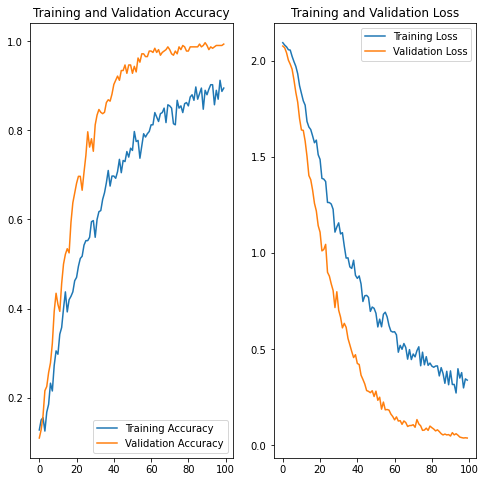

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **9. We evaluate the model on our test data**

https://www.tensorflow.org/tutorials/video/video_classification#load_and_preprocess_video_data

In [ ]:
model.evaluate(test_generator, return_dict = True)

30/30 [==============================] - 7s 234ms/step - loss: 0.0313 - accuracy: 0.9958


{'loss': 0.031346965581178665, 'accuracy': 0.9958333373069763}

# **10. confusion matrix & classification report**

https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Generating Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator)
print("=============================================================================================")
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(validation_generator.classes, y_pred)
cm = np.array2string(conf_matrix)
print(conf_matrix)
print("=============================================================================================")
print('Classification Report')
target_names = ['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']
class_rep = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(class_rep)

30/30 [==============================] - 7s 236ms/step
Confusion Matrix
[[ 7  6 11  7  7  5  8  9]
 [ 9 12  6  4  5 10  4 10]
 [ 3  7  5  8 11  7 10  9]
 [ 7 12  5 13  5  7  5  6]
 [13  5  8  7  7  5  6  9]
 [ 7  8 10  9  8  7  4  7]
 [10  8  7  7 12  7  7  2]
 [ 5  2  8  4  5 12 15  9]]
Classification Report
                    precision    recall  f1-score   support

           Euglena       0.11      0.12      0.12        60
             Hydra       0.20      0.20      0.20        60
      Rod_bacteria       0.08      0.08      0.08        60
             Yeast       0.22      0.22      0.22        60
   Spiral_bacteria       0.12      0.12      0.12        60
        Paramecium       0.12      0.12      0.12        60
Spherical_bacteria       0.12      0.12      0.12        60
            Amoeba       0.15      0.15      0.15        60

          accuracy                           0.14       480
         macro avg       0.14      0.14      0.14       480
      weighted avg       0.

# **11. plot confusion matrix**

In [ ]:
import itertools 

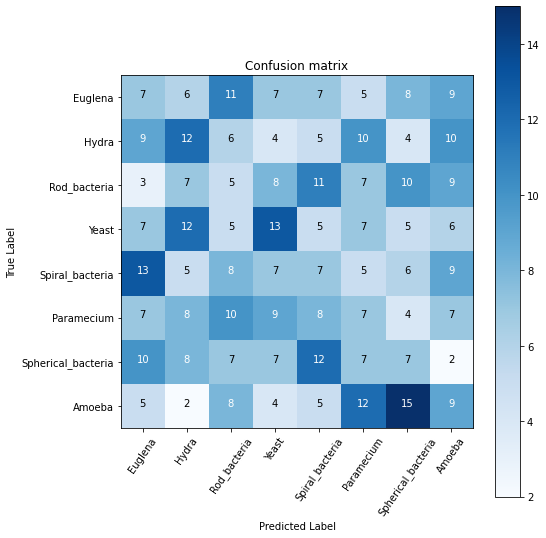

In [ ]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(8,8))

    plt.imshow(cm, 
               interpolation='nearest', 
               cmap=cmap)

    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()


cm = confusion_matrix(validation_generator.classes, y_pred)

cm_plot_label = ['Euglena', 'Hydra', 'Rod_bacteria', 'Yeast', 'Spiral_bacteria', 'Paramecium', 'Spherical_bacteria', 'Amoeba']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion matrix')

# **====================================================================**